In [108]:
! pip install openpyxl

In [109]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))


sns.set_theme()

fruits = pd.read_excel("/kaggle/input/date-fruit-datasets/Date_Fruit_Datasets/Date_Fruit_Datasets.xlsx")

fruits.head()

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/date-fruit-datasets/Date_Fruit_Datasets/Date_Fruit_Datasets.xlsx'

In [ ]:
print(fruits.describe())

print('\n')

print(fruits.info())

                AREA    PERIMETER   MAJOR_AXIS  MINOR_AXIS  ECCENTRICITY  \
count     898.000000   898.000000   898.000000  898.000000    898.000000   
mean   298295.207127  2057.660953   750.811994  495.872785      0.737468   
std    107245.205337   410.012459   144.059326  114.268917      0.088727   
min      1987.000000   911.828000   336.722700    2.283200      0.344800   
25%    206948.000000  1726.091500   641.068650  404.684375      0.685625   
50%    319833.000000  2196.345450   791.363400  495.054850      0.754700   
75%    382573.000000  2389.716575   858.633750  589.031700      0.802150   
max    546063.000000  2811.997100  1222.723000  766.453600      1.000000   

          EQDIASQ    SOLIDITY    CONVEX_AREA      EXTENT  ASPECT_RATIO  ...  \
count  898.000000  898.000000     898.000000  898.000000    898.000000  ...   
mean   604.577938    0.981840  303845.592428    0.736267      2.131102  ...   
std    119.593888    0.018157  108815.656947    0.053745     17.820778  ...   

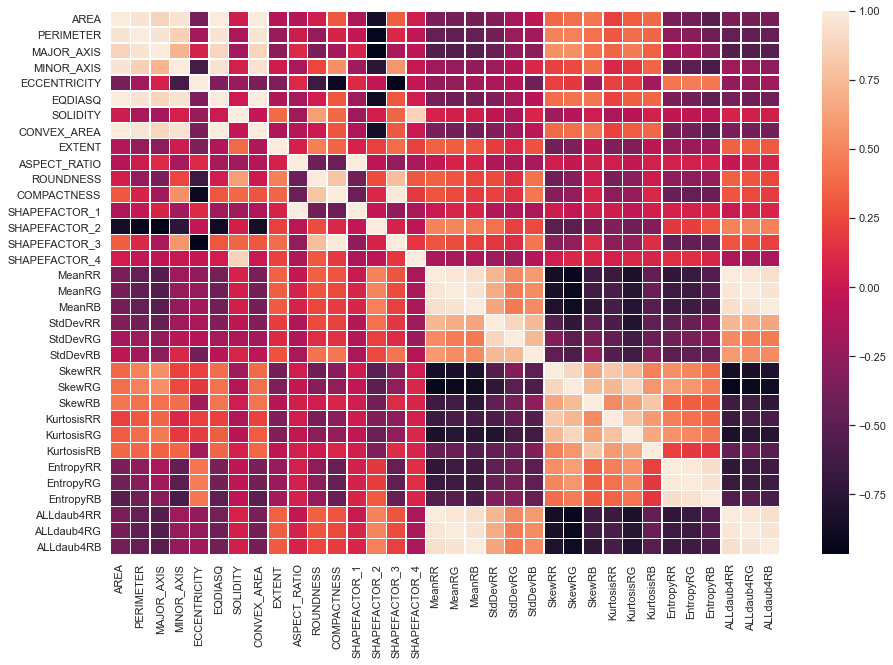

In [ ]:
plt.figure(figsize=(15,10))
ax = sns.heatmap(fruits.corr(), linewidths=.5)

# Splitting the dataset into train and test sets

In [ ]:
fruits_train, fruits_test = train_test_split(fruits, test_size=0.3, random_state=42)

# Scaling the data

In [ ]:
X_train = fruits_train.drop('Class', axis=1)
y_train = fruits_train['Class']

X_test = fruits_test.drop('Class', axis=1)
y_test = fruits_test['Class']

#Instantiate MinMaxScaler and use it to rescale X_traind and X_test
#scaler = MinMaxScaler(feature_range=(0,1))
scaler = MinMaxScaler()
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.fit_transform(X_test)

# Fiting a logistic regression model

In [ ]:
logreg = LogisticRegression(solver='lbfgs', max_iter=1000)

logreg.fit(rescaledX_train, y_train.ravel())

c:\Users\iagom\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Making predictions and evaluating performance

Accuracy of logistic regression classifier:  0.8444444444444444
[[ 9  1  0  2  4  1  0]
 [ 0 15 10  0  2  0  1]
 [ 0  0 67  0  0  0  0]
 [ 0  0  0 13  5  3  0]
 [ 0  1  0  0 53  0  1]
 [ 0  0  0  0  0 51  0]
 [ 0  7  2  0  0  2 20]]


<AxesSubplot:>

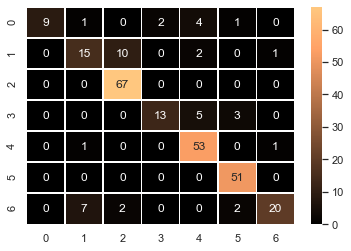

In [110]:
y_pred = logreg.predict(rescaledX_test)

print('Accuracy of logistic regression classifier: ', logreg.score(rescaledX_test, y_test))

print(confusion_matrix(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), cmap = 'copper', annot=True, linewidth=.5, linecolor = 'white')

# Grid searching and making the model perform better

In [111]:
tol = [0.01, 0.001, 0.0001]
max_iter = [300 , 500, 700]

param_grid = dict(tol = tol, max_iter = max_iter)


grid_model = GridSearchCV(estimator = logreg, param_grid=param_grid, cv = 5)

# Fit grid_model to the data
grid_model_result = grid_model.fit(rescaledX_train, y_train.ravel())

# Summarize results
best_score, best_params = grid_model_result.best_score_, grid_model_result.best_params_
print("Best: %f using %s" % (best_score, best_params))

# Extract the best model and evaluate it on the test set
best_model = grid_model_result.best_estimator_
print("Accuracy of logistic regression classifier: ", best_model.score(rescaledX_test, y_test))

Best: 0.882260 using {'max_iter': 300, 'tol': 0.01}
Accuracy of logistic regression classifier:  0.8444444444444444
